## MOVIE RECOMMENDATION SYSTEM

### Phase 4 Project
Student Name: Peter Kariuki Elizabeth

Module: Full Time

Instructor: Winnie Anyoso

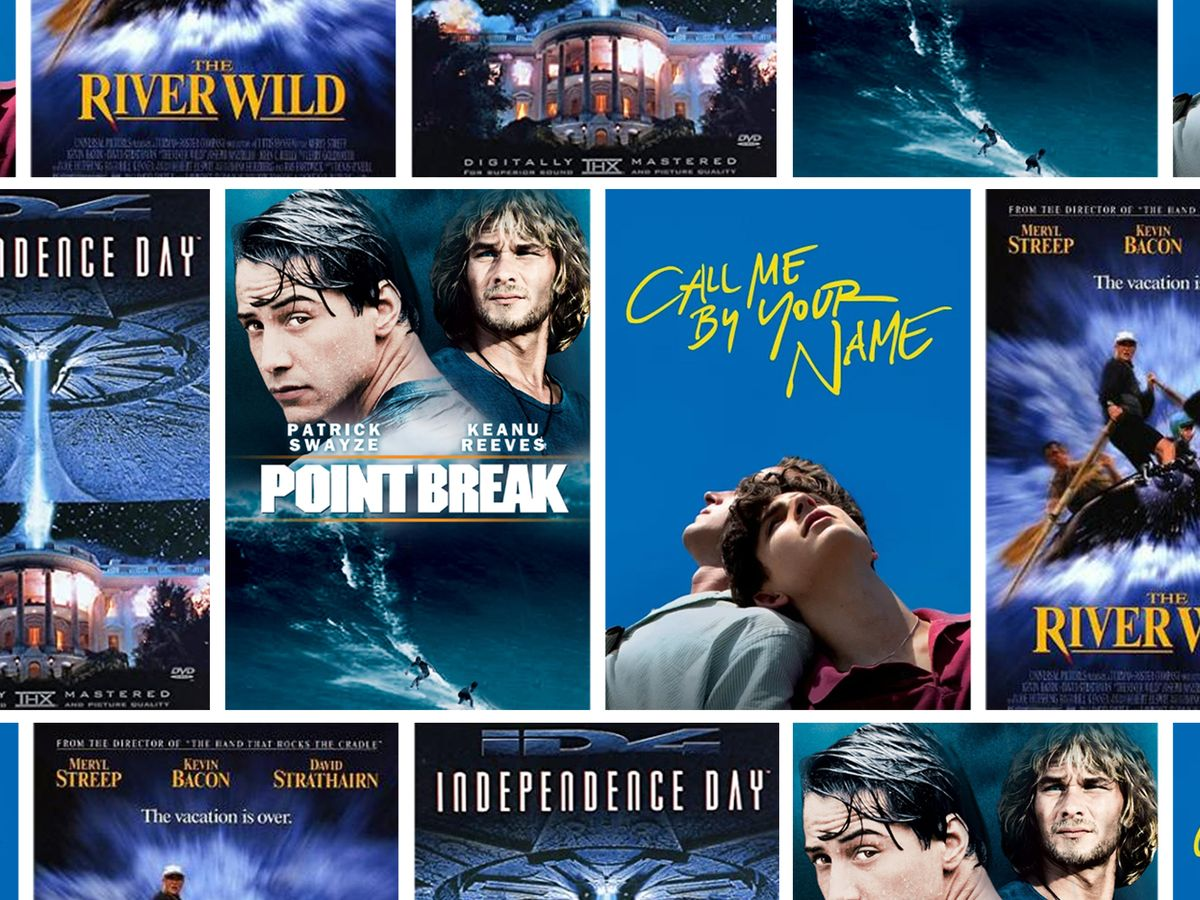

### Table Of Contents
###### Introduction
###### Business Understanding
- Objectives
- Stakeholders
###### Data Understanding
- Data Source
###### Problem Statement
- Constraints and Assumptions
- Expected Outcomes
- Benefits
###### Importing Necessary Packages
###### Load Datasets
###### Data Cleaning
###### Exploratory Data Analysis (EDA)
###### Movies Recommendation Model
- Collaborative Filtering Model
- Content-based Filtering Model
###### Conclusion and Recommendations

### Introduction
In today's world, there exists a lot of data that has led to the information overload challenge. Users encounter various choices, making it difficult to discover content based on their preferences. The emergence of recommender systems has served as a critical solution to this challenge, offering personalized suggestions tailored to individual user profiles. This project will delve into the world of recommender systems by employing advanced machine learning techniques to develop a robust recommendation engine. The primary aim of this project is to revolutionize how users interact with digital platforms and ensure they receive tailored content recommendation that cater to their unique tastes and preferences.This is done by building a model that provides top 5 movie recommendations to a user, based on their ratings of other movies using a collaborative filtering recommedation system.

### Business Understanding

#### Objectives
The primary objective of undertaking this project is to design, implement, and evaluate a recommender system that promotes both user engagement and satisfaction. The adoption of state-of-the-art machine learning algorithms and methodologies will help create a recommendation engine that adapt dynamically to user behavior and preferences. It will also seek to transform user experiences across a wide array of applications. 

#### Stakeholders
The success of this project will be great benefit to different users:
- E-commerce platforms - boost sales and customer loyalty.
- Content streaming services - retain subscribers.
- Movie and entertainment services - users of movie streaming platforms such as Netflix and Spotify to receive movies and album recommendations based on their watching habits and preferences.

### Data Understanding

#### Data Source
The data used to build the recommender system originates from [document here]('https://grouplens.org/datasets/movielens/latest/'). The data was updated in 2018, consisting of 100,000 ratings and 3,600 tag application applied to 9,000 movies by 600 users.

### Problem Statement 
In the context of the given dataset, our objective is to enhance movie recommendations for users. Our aim is to provide more accurate and perconalized movie recommendations to users based on their preferences and behavior. 
#### Constraints and Assumptions
- The dataset is relatively small, which may limit the complexity of models that can be effectively trained.
- The data was lastly updated in September 2018, and thus any changes in movie preferences and ratings after this period are not considered.
- It is assumed that all users and consistent and understood the rating scale.

#### Expected Outcomes
The project will aim to deliver an improved recommendation system that promotes user experience and satisfaction. 

#### Benefits
The recommender system will offer a wide array of benefits to various stakeholders in the movie industry, which are:
- Enhanced user experience - provide personalized suggestions and make it easier for movie users to discover relevant and interesting content.
- Increased sales and revenue - it would lead to higher conversion rates and increased sales by guiding users towards movies they are more likely to purchase.
- Time and effort savings - the recommender system would help movie users quickly findly what their preferences, reduce time and effort spent on serching through a large pool of options.
- Content discovery - the system would enable users in the media and content platforms discover new movies they may not have come across otherwise. 

### Importing Necessary Packages 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from ast import literal_eval
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
# load the movies dataset and read first five rows
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# check shape of the dataset
movies_df.shape  #The dataset has three columns and 9742 rows

(9742, 3)

In [4]:
# load the ratings dataset
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_df.shape #The dataset has 4 columns and 100836 rows.

(100836, 4)

The dataset has userId, movieId, rating and timestamp columns.

In [6]:
# merge the two datasets on 'movieId' and read first five rows
merged_file = movies_df.merge(ratings_df, on='movieId')
merged_file.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [7]:
merged_file.shape #The merged dataset has six columns and 100836 rows.

(100836, 6)

In [8]:
# select relevant columns important for our analysis
merged_file = merged_file[['movieId', 'userId', 'rating']]
merged_file.head()

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
3,1,15,2.5
4,1,17,4.5


Merged dataset has three columns: MovieId, title and genres.
- MovieId - identifier for movies
- title - label given to the moview
- rating - score given by each user on a scale of 1-5

In [9]:
merged_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   userId   100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


Data has the correct data types

### Data Cleaning

In [10]:
merged_file['rating'].value_counts() #most users gave a rating of 4.0., 3.0, 5.0, and 3.5.

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [11]:
#consider movies with rating above 3.5

highly_rated_movies = merged_file.loc[merged_file['rating'] >= 3.5, ['movieId', 'userId', 'rating']]

# Display the selected rows
highly_rated_movies

,movieId,userId,rating
0,1,1,4.0
1,1,5,4.0
2,1,7,4.5
4,1,17,4.5
5,1,18,3.5
...,...,...,...
100831,193581,184,4.0
100832,193583,184,3.5
100833,193585,184,3.5
100834,193587,184,3.5


In [12]:
#verify to ratings
len(highly_rated_movies)

61716

In [13]:
ratings = highly_rated_movies[['movieId', 'userId', 'rating']]

In [14]:
# check whether same user has rated same movie twice - check for the max value
filtered_ratings = ratings.groupby(['userId','movieId']).aggregate(np.max)

In [15]:
len(filtered_ratings)

61716

There are no cases where users has rated movies twice

In [16]:
#create user item matrix
highly_rated_movies = highly_rated_movies.pivot(index='movieId', columns='userId', values='rating')

# Display the user-item matrix
highly_rated_movies

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The matrix shows that user 1 gave a rating of 4.0 for the first, third and sixth movies. However, no rating was given to the second and fifth movies.

In [17]:
# Fill NaN values with zeros (if a user hasn't rated a movie, it's considered as a 0 rating)
highly_rated_movies.fillna(0, inplace=True)

# Display the user-item matrix
highly_rated_movies.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


### Exploratoty Data Analysis

In [18]:
#Get the percentage count of each rating value and round to one decimal place
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)

count_ratings

,movieId,userId,perc_total
rating,,,
3.5,13136,13136,21.3
4.0,26818,26818,43.5
4.5,8551,8551,13.9
5.0,13211,13211,21.4


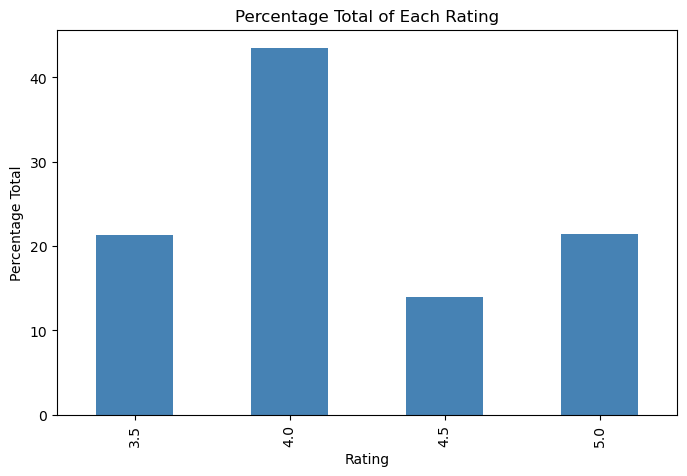

In [19]:
#visualize the percentage total of each rating
ax = count_ratings['perc_total'].plot(kind='bar', color='steelblue', figsize=(8, 5))

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Percentage Total')
plt.title('Percentage Total of Each Rating')

# Show the plot
plt.show()

The rating of 4.0 at takes the largest percentage of total users, at 43.50% followed by 5.0 rating at 21.40%.

Reduce the noise for the dataset by adding some filters and qualify the movies.

- To qualify a movie, minimum 10 users should have voted a movie.
- To qualify a user, minimum 50 movies should have voted by the user.

In [20]:
#count total number os users who voted for each movie

no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_user_voted

movieId
1         165
2          61
3          23
5          13
6          76
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 7363, dtype: int64

In [21]:
#count number of movies voted by every user

no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
no_movies_voted

userId
1      200
2       23
3       17
4      128
5       23
      ... 
606    854
607    111
608    406
609     10
610    929
Name: rating, Length: 609, dtype: int64

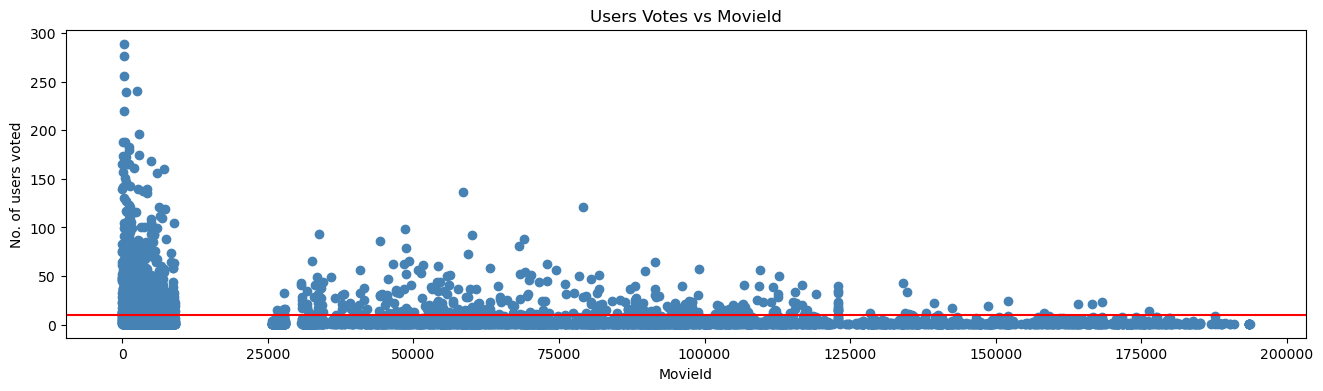

In [22]:
#visualization for number of users who voted per movieId
#minimum 10 users should have voted a movie
f,ax = plt.subplots(1,1,figsize=(16,4))

plt.scatter(no_user_voted.index,no_user_voted,color='steelblue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.title('Users Votes vs MovieId')
plt.show()

In [23]:
highly_rated_movies = highly_rated_movies.loc[no_user_voted[no_user_voted > 10].index,:]

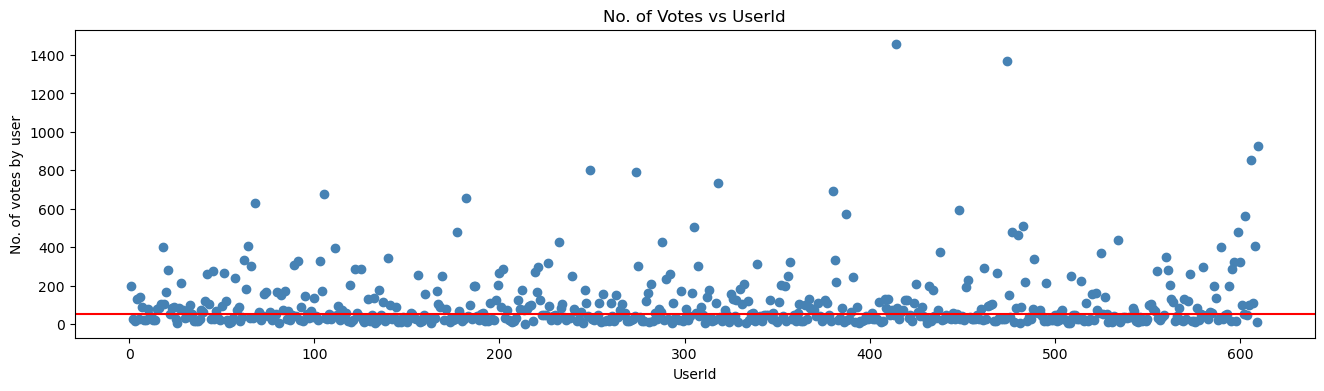

In [24]:
#visualization for number of votes by user
#minimum 50 movies should have voted by the user
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='steelblue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.title('No. of Votes vs UserId')
plt.show()

In [25]:
highly_rated_movies = highly_rated_movies.loc[:,no_movies_voted[no_movies_voted > 50].index]
highly_rated_movies

userId,1,4,6,7,10,15,16,17,18,19,...,599,600,601,602,603,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,0.0,4.5,3.5,4.0,...,0.0,0.0,4.0,0.0,4.0,4.0,0.0,4.0,0.0,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,4.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
164179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
166528,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [26]:
highly_rated_movies.shape

(1333, 284)

The final dataset has 1333*284 dimension and most values are sparse. Use csr_matric scipy libraly to reduce sparsity.

In [27]:
final_dataset_csr = csr_matrix(highly_rated_movies.values)
highly_rated_movies.reset_index(inplace=True)

In [28]:
highly_rated_movies.shape

(1333, 285)

### Movie Recommendation Model

### Collaborative Filtering Model

Use KNN metric to compute cosine distance 

In [29]:
#build the KNN model using cosine metric
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(final_dataset_csr)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [30]:
def get_movie_recommendation(name_of_movie):
    n_movies_to_reccomend = 10
    movie_list = movies_df[movies_df['title'].str.contains(name_of_movie)]  
    if len(movie_list):        
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = highly_rated_movies[highly_rated_movies['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(final_dataset_csr[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = highly_rated_movies.iloc[val[0]]['movieId']
            idx = movies_df[movies_df['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies_df.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [31]:
get_movie_recommendation("Father of the Bride Part II")

,Title,Distance
1,While You Were Sleeping (1995),0.655203
2,Sgt. Bilko (1996),0.653065
3,Tin Cup (1996),0.639631
4,"Hunchback of Notre Dame, The (1996)",0.630641
5,"Client, The (1994)",0.612313
6,Grumpier Old Men (1995),0.607412
7,First Knight (1995),0.575153
8,"Indian in the Cupboard, The (1995)",0.545912
9,Sabrina (1995),0.534217
10,Miracle on 34th Street (1994),0.319701


In [32]:
get_movie_recommendation("Toy Story")

,Title,Distance
1,Star Wars: Episode VI - Return of the Jedi (1983),0.432465
2,"Monsters, Inc. (2001)",0.431145
3,Star Wars: Episode V - The Empire Strikes Back...,0.427486
4,Back to the Future (1985),0.426436
5,"Sixth Sense, The (1999)",0.424360
6,Star Wars: Episode IV - A New Hope (1977),0.407557
7,Raiders of the Lost Ark (Indiana Jones and the...,0.405659
8,Jurassic Park (1993),0.399316
9,Shrek (2001),0.370891
10,Toy Story 2 (1999),0.360091


In [33]:
get_movie_recommendation("Jumanji")

,Title,Distance
1,Star Wars: Episode I - The Phantom Menace (1999),0.592834
2,"Mask, The (1994)",0.589570
3,Aladdin (1992),0.583496
4,Back to the Future Part II (1989),0.577440
5,"Incredible Hulk, The (2008)",0.572832
6,Mrs. Doubtfire (1993),0.565629
7,Independence Day (a.k.a. ID4) (1996),0.564591
8,Jurassic Park (1993),0.550188
9,"Santa Clause, The (1994)",0.538327
10,"Lion King, The (1994)",0.531453


The recommendation system gives a list of top ten movies along with their closeness (distance) to the input movie. The lower the distance the closer the movies are in terms of user preferences. For example,the top movie related to Toy Story is Toy Story 2.

### Content Based Filtering Model
Address cold start problem

In [34]:
#Preprocess genres
movies_df['genres'] = movies_df['genres'].str.replace('|', ' ')

#Vectorize genres
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

#Calculate similarity scores
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_content_based_recommendations(movie_title, cosine_sim=cosine_sim):
    # Get the index of the movie with the provided title
    idx = movies_df[movies_df['title'] == movie_title].index[0]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]  # Exclude the movie itself
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    recommendations_df = movies_df.loc[movie_indices, ['title', 'genres']].reset_index(drop=True)
    recommendations_df['Similarity Score'] = [i[1] for i in sim_scores]
    
    return recommendations_df

In [35]:
get_content_based_recommendations("Toy Story (1995)")

,title,genres,Similarity Score
0,Antz (1998),Adventure Animation Children Comedy Fantasy,1.0
1,Toy Story 2 (1999),Adventure Animation Children Comedy Fantasy,1.0
2,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,1.0
3,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,1.0
4,"Monsters, Inc. (2001)",Adventure Animation Children Comedy Fantasy,1.0
5,"Wild, The (2006)",Adventure Animation Children Comedy Fantasy,1.0
6,Shrek the Third (2007),Adventure Animation Children Comedy Fantasy,1.0
7,"Tale of Despereaux, The (2008)",Adventure Animation Children Comedy Fantasy,1.0
8,Asterix and the Vikings (Astérix et les Viking...,Adventure Animation Children Comedy Fantasy,1.0
9,Turbo (2013),Adventure Animation Children Comedy Fantasy,1.0


In [36]:
get_content_based_recommendations("Waiting to Exhale (1995)")

,title,genres,Similarity Score
0,"American President, The (1995)",Comedy Drama Romance,1.0
1,Mighty Aphrodite (1995),Comedy Drama Romance,1.0
2,"Postman, The (Postino, Il) (1994)",Comedy Drama Romance,1.0
3,Beautiful Girls (1996),Comedy Drama Romance,1.0
4,Something to Talk About (1995),Comedy Drama Romance,1.0
5,Don Juan DeMarco (1995),Comedy Drama Romance,1.0
6,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy Drama Romance,1.0
7,Nobody's Fool (1994),Comedy Drama Romance,1.0
8,"Corrina, Corrina (1994)",Comedy Drama Romance,1.0
9,I Like It Like That (1994),Comedy Drama Romance,1.0


In [37]:
get_content_based_recommendations("Father of the Bride Part II (1995)")

,title,genres,Similarity Score
0,Four Rooms (1995),Comedy,1.0
1,Ace Ventura: When Nature Calls (1995),Comedy,1.0
2,Bio-Dome (1996),Comedy,1.0
3,Friday (1995),Comedy,1.0
4,Black Sheep (1996),Comedy,1.0
5,Mr. Wrong (1996),Comedy,1.0
6,Happy Gilmore (1996),Comedy,1.0
7,"Steal Big, Steal Little (1995)",Comedy,1.0
8,Flirting With Disaster (1996),Comedy,1.0
9,Down Periscope (1996),Comedy,1.0


A similarity score of 1.0 for the recommended movies implies that they are highly similar to the input moview based on the content. This could likely occur since they share the same genres.

### Conclusion and Recommendations


In this conversation, we covered various aspects of building a movie recommendation system. Here's a summary of what we discussed:

- Data Preparation:
We began by loading and preparing the necessary data, including user ratings and movie information.
- User-Item Matrix:
We created a user-item matrix to represent user preferences for movies.
- Qualification Criteria:
We applied criteria to filter highly rated movies and active users, ensuring that the dataset used for recommendations meets specific quality standards.
- Sparsity Reduction:
We used the csr_matrix from the scipy library to reduce the sparsity of the user-item matrix, which is beneficial for computational efficiency.
- K-Nearest Neighbors (KNN):
We implemented a KNN model using cosine similarity to find movies similar to a given one.
- Content-Based Filtering:
We used ontent-based filtering to recommend movies based on features like genres to address cold start problem.
- Collaborative Filtering:
We used collaborative filtering to recommend movies based on the users preferences. 

Thus, creating a movie recommendation system would improve user experience by offering personalized movie suggestions based on personal preferences. 